# COVID-19 Mortality Prediction with Support Vector Regression Model

### Dependencies importing

In [1]:
# Auto reload imported module every time a jupyter cell is executed
%load_ext autoreload
%autoreload 2
### TBE -> To Be Engineering...
# covid_ts_pred package
from covid_ts_pred.c_eng.engineering import *

project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/.env
project env_path /Users/tekyteka/code/Teky-Teka/covid_ts_pred/covid_ts_pred/.env


In [2]:
import pandas as pd
import numpy as np
import itertools
import matplotlib.pyplot as plt
%matplotlib inline
import plotly.express as px
import seaborn as sns 
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In [3]:
 #sklearn preproc

from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline, make_pipeline
from sklearn.compose import ColumnTransformer, make_column_transformer, make_column_selector
from sklearn.impute import SimpleImputer, KNNImputer
from sklearn.preprocessing import RobustScaler, OneHotEncoder, OrdinalEncoder
from sklearn.metrics import make_scorer
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
from sklearn.metrics import mean_absolute_percentage_error

import pickle

In [4]:
### TBE done!
country='Italy'

In [5]:
### TBE done!
data_index = pd.read_csv(get_csv_out_path(f'index_{country}.csv'))

In [6]:
data_index.head()

,date,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,people_fully_vaccinated,total_boosters
0,2020-02-21,0.043473,0.050420,0.0,20.0,17.0,1.0,1.0,0.038026,0.0,0.0,0.0,0.0
1,2020-02-22,0.052921,0.067227,0.0,62.0,42.0,2.0,1.0,0.046294,0.0,0.0,0.0,0.0
2,2020-02-23,0.090265,0.116794,0.0,155.0,93.0,3.0,1.0,0.078940,0.0,0.0,0.0,0.0
3,2020-02-24,0.090265,0.116794,0.0,229.0,74.0,7.0,4.0,0.078940,0.0,0.0,0.0,0.0
4,2020-02-25,0.090265,0.116794,0.0,322.0,93.0,10.0,3.0,0.078940,0.0,0.0,0.0,0.0


In [7]:
data_index=data_index.set_index('date')

In [8]:
data_index['day-1']=data_index['total_deaths'].shift(periods=1)
data_index['day-2']=data_index['total_deaths'].shift(periods=2)
data_index['day-3']=data_index['total_deaths'].shift(periods=3)
data_index['day-4']=data_index['total_deaths'].shift(periods=4)
data_index['day-5']=data_index['total_deaths'].shift(periods=5)
data_index['day-6']=data_index['total_deaths'].shift(periods=6)
data_index['day-7']=data_index['total_deaths'].shift(periods=7)
data_index['day-8']=data_index['total_deaths'].shift(periods=8)
data_index['day-9']=data_index['total_deaths'].shift(periods=9)
data_index['day-10']=data_index['total_deaths'].shift(periods=10)
data_index = data_index.iloc[10: , :]
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.099713,0.126885,0.0,2036.0,342.0,52.0,18.0,0.087209,0.0,0.0,...,34.0,29.0,21.0,17.0,12.0,10.0,7.0,3.0,2.0,1.0
2020-03-03,0.099713,0.126885,0.0,2502.0,466.0,79.0,27.0,0.087209,0.0,0.0,...,52.0,34.0,29.0,21.0,17.0,12.0,10.0,7.0,3.0,2.0
2020-03-04,0.102539,0.131931,0.0,3089.0,587.0,107.0,28.0,0.089685,0.0,0.0,...,79.0,52.0,34.0,29.0,21.0,17.0,12.0,10.0,7.0,3.0
2020-03-05,0.104428,0.135288,0.0,3858.0,769.0,148.0,41.0,0.091335,0.0,0.0,...,107.0,79.0,52.0,34.0,29.0,21.0,17.0,12.0,10.0,7.0
2020-03-06,0.104428,0.135288,0.0,4636.0,778.0,197.0,49.0,0.091335,0.0,0.0,...,148.0,107.0,79.0,52.0,34.0,29.0,21.0,17.0,12.0,10.0


In [9]:
data_index=data_index.fillna(0)

In [10]:
data_index.head()

,containment_and_health,stringency,economics_sup,total_cases,new_cases,total_deaths,new_deaths,gov_response,total_vaccinations,people_vaccinated,...,day-1,day-2,day-3,day-4,day-5,day-6,day-7,day-8,day-9,day-10
date,,,,,,,,,,,,,,,,,,,,,
2020-03-02,0.099713,0.126885,0.0,2036.0,342.0,52.0,18.0,0.087209,0.0,0.0,...,34.0,29.0,21.0,17.0,12.0,10.0,7.0,3.0,2.0,1.0
2020-03-03,0.099713,0.126885,0.0,2502.0,466.0,79.0,27.0,0.087209,0.0,0.0,...,52.0,34.0,29.0,21.0,17.0,12.0,10.0,7.0,3.0,2.0
2020-03-04,0.102539,0.131931,0.0,3089.0,587.0,107.0,28.0,0.089685,0.0,0.0,...,79.0,52.0,34.0,29.0,21.0,17.0,12.0,10.0,7.0,3.0
2020-03-05,0.104428,0.135288,0.0,3858.0,769.0,148.0,41.0,0.091335,0.0,0.0,...,107.0,79.0,52.0,34.0,29.0,21.0,17.0,12.0,10.0,7.0
2020-03-06,0.104428,0.135288,0.0,4636.0,778.0,197.0,49.0,0.091335,0.0,0.0,...,148.0,107.0,79.0,52.0,34.0,29.0,21.0,17.0,12.0,10.0


Text(0.5, 0, 'Date')

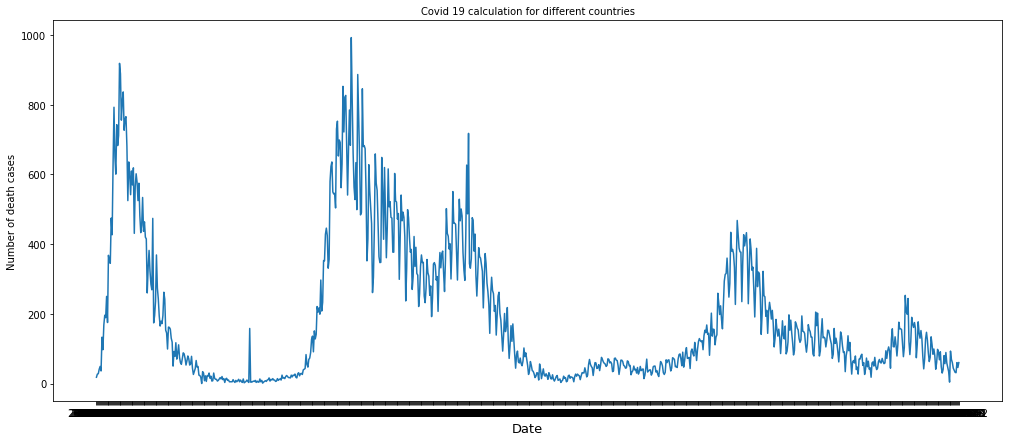

In [11]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,data_index['new_deaths']);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

Text(0.5, 0, 'Date')

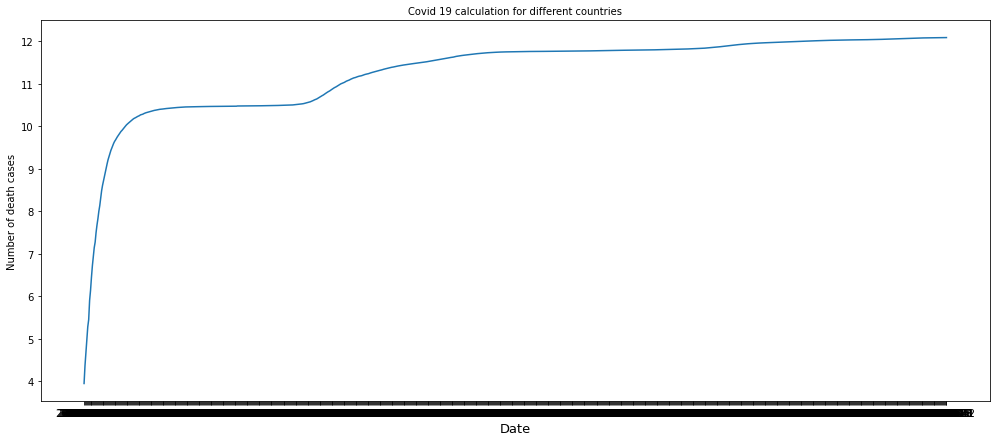

In [12]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(data_index.index,np.log(data_index['total_deaths']));
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)

<AxesSubplot:xlabel='new_deaths', ylabel='Count'>

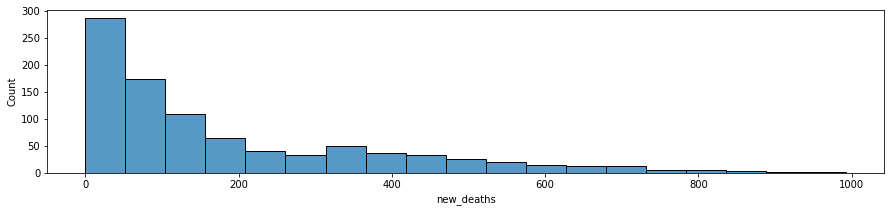

In [13]:

plt.figure(figsize=(15,3))
sns.histplot(data_index['new_deaths'])

# splitting of data into x and y

In [14]:
X=data_index.drop(columns=['total_deaths','new_deaths','new_cases'])
y=data_index['total_deaths']

## scaling data

In [15]:
scaler = MinMaxScaler()
scaler.fit(X)
X=scaler.transform(X)

# splitting data into train and test set

In [16]:
n = len(X)
X_train = X[0:int(n-50)]
X_test=X[int(n-50):]
y_train=y[0:int(n-50)]
y_test=y[int(n-50):]

# Model

In [17]:
model =SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

In [18]:
param={'kernel' : ('poly', 'rbf'),'C' : [5,6],'degree' : [3,8],'coef0' : [0.01,0.5,10]}
grid_search = GridSearchCV(model, param_grid = param, 
                      cv = 2, n_jobs = -1, verbose = 2)
grid_search.fit(X_train,y_train)
best=grid_search.best_estimator_

Fitting 2 folds for each of 24 candidates, totalling 48 fits
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=3, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=3, kernel=rbf; total time=   0.1s
[CV] END .............C=5, coef0=0.01, degree=3, kernel=poly; total time=   0.0s
[CV] END ..............C=5, coef0=0.5, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.0s
[CV] END ..............C=5, coef0=0.01, degree=3, kernel=rbf; total time=   0.1s
[CV] END ...............C=5, coef0=0.5, degree=8, kernel=rbf; total time=   0.1s
[CV] END .............C=5, coef0=0.01, degree=8, kernel=poly; total time=   0.0s
[CV] END ...............C=5, coef0=10, degree=3,

In [19]:
best

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

## fitting the model for train and test set

In [20]:
model=best
best_model=model.fit(X_train,y_train)
best_model

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [21]:
country='France'

In [22]:
path='/home/sumedha/code/covid_time_series_prediction/covid_time_series_prediction/data/models'

In [23]:
best_model

SVR(C=6, coef0=10, epsilon=0.05, kernel='poly')

In [24]:
country

'France'

In [25]:
with open(f'{path}/model_{country}.pkl','wb') as f:
    pickle.dump(best_model, f)

FileNotFoundError: [Errno 2] No such file or directory: '/home/sumedha/code/covid_time_series_prediction/covid_time_series_prediction/data/models/model_France.pkl'

In [ ]:
model_load=pickle.load(open(f'{path}/model_{country}.pkl','rb'))

In [ ]:
model_load

SVR(C=5, coef0=10, epsilon=0.05, kernel='poly')

## prediction

In [ ]:
y_pred=best_model.predict(X_test)

## evaluating model performance

In [ ]:
score=mean_absolute_percentage_error(y_test, y_pred)
score, n_pred=10, c='USA'

0.005483227310211549

In [ ]:
y_pred.shape

(50,)

Text(0.5, 0, 'Date')

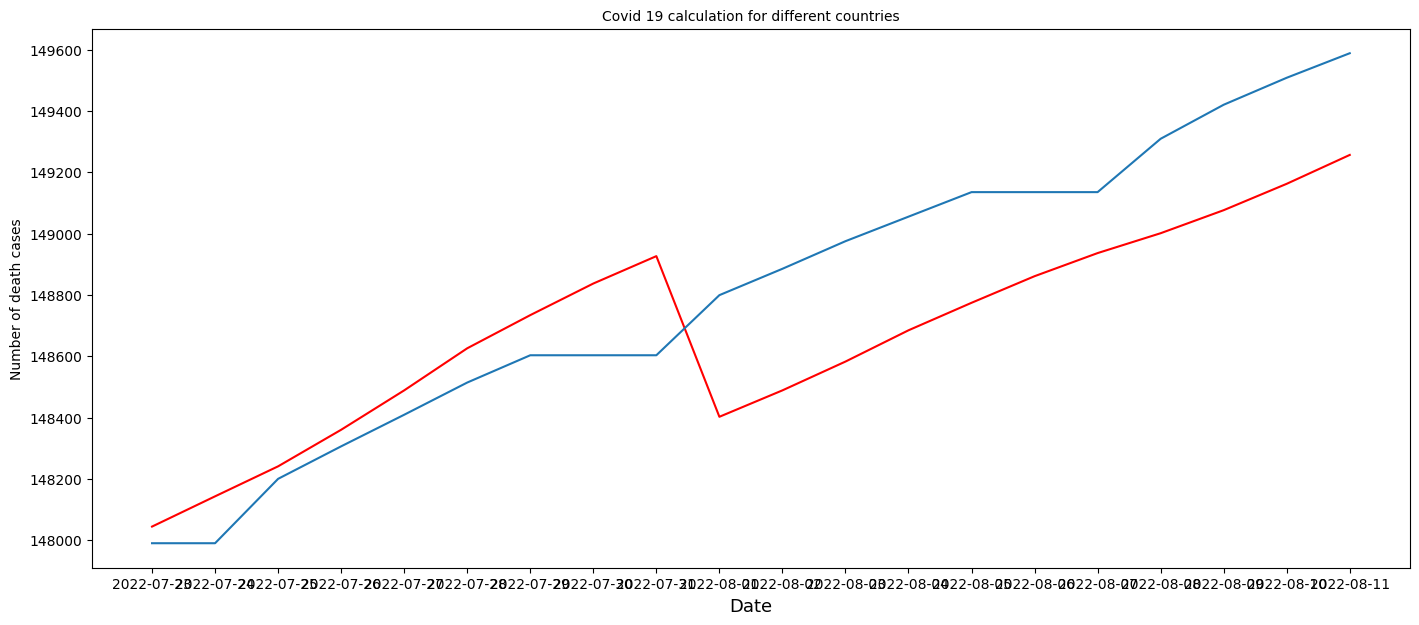

In [ ]:
fig, ax = plt.subplots(1, figsize=(17,7))
plt.plot(y_test.index[:20],y_pred[:20],color='r');
plt.plot(y_test.index[:20],y_test[:20]);
ax.set_title("Covid 19 calculation for different countries", size=10)
ax.set_ylabel("Number of death cases", size=10)
ax.set_xlabel("Date", size=13)